# Gerar grafo direcionado aleatório

Insira o número de vértices no grafo: 
 >> 18


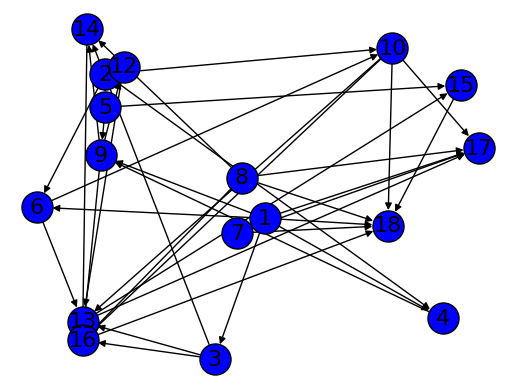

________________________________________
Vertices:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Arestas:  [[1, 3], [1, 4], [1, 6], [1, 7], [1, 9], [1, 17], [1, 18], [2, 4], [2, 5], [2, 6], [2, 10], [2, 12], [3, 13], [3, 14], [3, 16], [4, 9], [5, 9], [5, 15], [6, 10], [6, 13], [7, 17], [7, 18], [8, 14], [8, 16], [8, 17], [8, 18], [9, 12], [9, 14], [9, 16], [10, 13], [10, 16], [10, 17], [10, 18], [12, 13], [13, 15], [13, 17], [14, 16], [15, 18], [16, 18]]
________________________________________


In [73]:
import math
import random
import networkx as nx
import matplotlib.pyplot as plt

# Entrada: n representa o número de vértices no grafo.
n = int(input("Insira o número de vértices no grafo: \n >> "))
n += 1

# variável de probabilidade de conexão
prob_conexao = math.log(n) / n
vertices = []
arestas = []

# Preencha a lista de arestas
for i in range(1,n):
  vertices.append(i)
  for j in range(1, n):
    if (j > i):
      # Obtenha um número aleatório t, entre 0 e 1.
      t = random.randint(0, 10) / 10
      # se (t for maior que 1 - probabilidade de conexão) => insira a aresta na lista de arestas que conecta os nós do grafo
      if (t > 1 - prob_conexao):
        # Acrescente o par ordenado (i, j) ao final de “arestas”
        arestas.append([i,j])

# Criando um grafo nao direcional com as arestas
G = nx.DiGraph()
for parOrdenado in arestas:
  i = parOrdenado[0]
  j = parOrdenado[1]
  G.add_edge(i, j) # adiciona aresta

# definindo de forma aleatoria posicoes de cada nó do grafo
pos = {}
for i in range(1, n):
  x_vertice = random.randint(1,100)/10
  y_vertice = random.randint(1,100)/10
  pos[i] = x_vertice, y_vertice

options = {
    "font_size": 16,
    "node_size": 500,
    "node_color": "blue",
    "edgecolors": "black",
    "linewidths": 1,
    "width": 1,
}

nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.show()


# Saída: G(V,E)
# G(V,E) representa o grafo aleatório simples, conexo, com o conjunto de vértices V = {1,2,3,...,N} e o conjunto de arestas E.
print("_"*40)
print("Vertices: ", vertices)
print("Arestas: ", arestas)
print("_"*40)

# Usar a matriz de adjacência para encontrar caminhos de tamanho pré-definidos pelo usuário em um grafo

In [74]:
import numpy as np

# tirando incremento de 1 para nao afetar o resultado esperado
num_vertices = n - 1
m_adjacencia_inicial = np.zeros((num_vertices, num_vertices), dtype=int)

# iterando a lista de caminhos possiveis entre os vertices
for caminho in arestas:
  inicio = caminho[0] - 1
  fim = caminho[1] - 1
  m_adjacencia_inicial[inicio][fim] += 1

# a matriz começa exponencial igual a 1(inicial), pois se trata de um caminho de tamanho 1
m_adjacencia = m_adjacencia_inicial

def verifica_caminho (inicio_escolhido, fim_escolhido):
  if (m_adjacencia[inicio_escolhido][fim_escolhido] >= 1):
    return f"há {m_adjacencia[inicio_escolhido][fim_escolhido]} caminhos possíveis"
  else:
    return "Caminho não encontrado"

# inputs:
tamanho_caminho = int(input("Insira o tamanho do caminho desejado: "))
inicio_escolhido = int(input("Insira o vértice de partida: ")) - 1
fim_escolhido = int(input("Insira o vértice de chegada: ")) - 1

# output: quantidade de caminhos possiveis dado dois vertices(inicio e fim) e o tamanho do caminho a ser percorrido
print("_"*40)
if (tamanho_caminho == 1):
  # aqui verificamos diretamente a quantidade de caminhos pois a matriz de adjacencia ja é de caminhos no tamanho 1
  print(verifica_caminho(inicio_escolhido, fim_escolhido))
else:
  for i in range(tamanho_caminho - 1):
    m_adjacencia = np.matmul(m_adjacencia, m_adjacencia_inicial)
  print(verifica_caminho(inicio_escolhido, fim_escolhido))
print("_"*40)

Insira o tamanho do caminho desejado: 4
Insira o vértice de partida: 1
Insira o vértice de chegada: 18
________________________________________
há 6 caminhos possíveis
________________________________________
